# 1. Hate Analysis in Marathi Tweets
**Exploratory Analysis**

In [3]:
import pandas as pd

train_data = pd.read_csv('/kaggle/input/datafiles/hate_train_target_1.csv',encoding = 'utf-8')
test_data = pd.read_csv('/kaggle/input/datafiles/hate_test_1.csv',encoding = 'utf-8')
validation_data = pd.read_csv('/kaggle/input/datafiles/hate_valid_1.csv',encoding = 'utf-8')

In [4]:
def data_analysis(data):
  print(data.head())
  print(data.dtypes)
  print(data.info())
  print(data.describe())
  print(data.isnull().sum())

In [5]:
import matplotlib.pyplot as plt

In [6]:
def print_pie(train_data):
  label_counts = train_data['label'].value_counts()

  labels = label_counts.index

  sizes = label_counts.values

  fig = plt.figure(figsize=(5,5))

  plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)

  plt.axis('equal')

  plt.show()

HATE = 1

OFFN = 2

PRFN = 3

NOT = 0


                                                text  label
0  @lokmat बहुसंख्यांक हिंदूंना घाबरट आणि मुर्ख ब...      1
1  @BalaNandgaonkar स्वतःचे खिसे भरत आहेत, यांना ...      1
2  या पुचाट UNO पेक्षा आमच्याकडचं ENO जास्त प्रभा...      1
3  एक हिजाब परिधान केलेली मुलगी काल परवापासून व्ह...      1
4  @KiritSomaiya @BJP4India @BJP4Maharashtra जंगी...      1
text     object
label     int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21500 entries, 0 to 21499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21500 non-null  object
 1   label   21500 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 336.1+ KB
None
             label
count  21500.00000
mean       1.50000
std        1.11806
min        0.00000
25%        0.75000
50%        1.50000
75%        2.25000
max        3.00000
text     0
label    0
dtype: int64


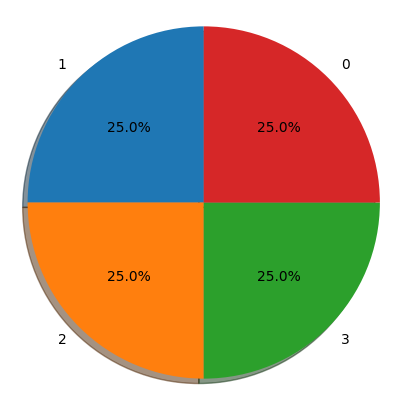

In [7]:
data_analysis(train_data)
print_pie(train_data)

                                                text  label
0  ते साड्यांची वअजागळ सूटची किम्मत व पार्टीत कित...      1
1  घोटाळेबाज सेनेचा आमदार प्रताप सरनाईक यांच्या घ...      1
2  ज्याच्यावर 50 लाखांचे इनाम सरकारने लावले होते ...      1
3  मोदी-भाजपद्वेष आणि भारतद्वेष-देशद्रोह ह्यातील ...      1
4  सुरुवात कुणी केली होती..? गुजराती ड्रग्ज माफिय...      1
text     object
label     int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None
             label
count  2000.000000
mean      1.500000
std       1.118314
min       0.000000
25%       0.750000
50%       1.500000
75%       2.250000
max       3.000000
text     0
label    0
dtype: int64


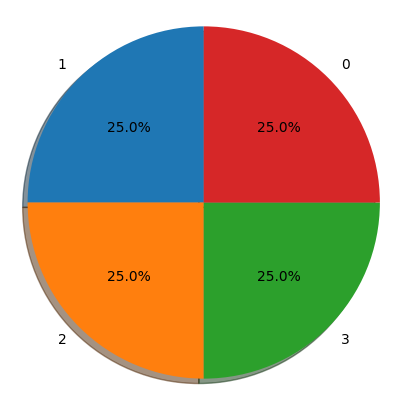

In [8]:
data_analysis(test_data)
print_pie(test_data)

                                                text  label
0  उद्धव ठाकरे किती दिवस ह्या विषारी अवलादी पोसणा...      1
1  @ManglaKohale11 टीव्हीवरच्या फालतू मालिकांचा प...      1
2  @Dev_Fadnavis साहेब आपली तोफ या चोर वसुली सरका...      1
3  असल्या कट्टर जिहादी लोकांची लायकी नाही संमेलना...      1
4  ह्या हडळ चे लेख आधी टाइम्स मध्ये वाचायचो. काही...      1
text     object
label     int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1500 non-null   object
 1   label   1500 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.6+ KB
None
             label
count  1500.000000
mean      1.500000
std       1.118407
min       0.000000
25%       0.750000
50%       1.500000
75%       2.250000
max       3.000000
text     0
label    0
dtype: int64


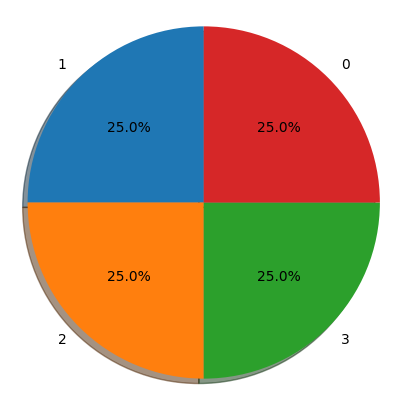

In [9]:
data_analysis(validation_data)
print_pie(validation_data)

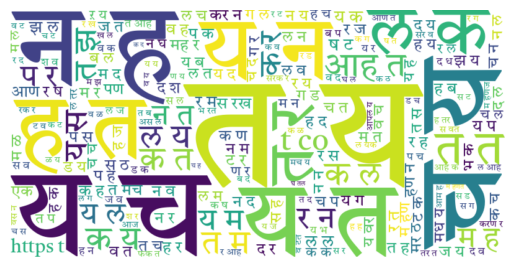

In [10]:
# Generate the marathi wordcloud from given dataset

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the Marathi text from the dataset
marathi_text = ' '.join(train_data['text'])

# Generate the wordcloud
wordcloud = WordCloud(font_path='/kaggle/input/datafiles/TiroDevanagariMarathi-Regular.ttf', width=800, height=400, background_color= 'white').generate(marathi_text)

# Plot the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [11]:
!pip install indic-nlp-library

In [12]:
import re

In [13]:
from indicnlp.tokenize import indic_tokenize

In [14]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [15]:
import emoji

# Process tweet with emojis with stpwords

In [16]:
import re
import string
from indicnlp.tokenize import indic_tokenize
import emoji

def process_tweet(tweet):
    # Remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    # Remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # Remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)

    # Remove hashtags (only removing the hash # sign from the word)
    tweet = re.sub(r'#', '', tweet)

    # Remove user mentions
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
    
    # Remove tokens
    with open('/kaggle/input/datafiles/marathi_stopwords.txt', 'r',encoding='utf-8-sig') as file:
        content = file.read()
        stopwords = content.split()
        
    words = tweet.split()
    filtered_words = [word for word in words if word not in stopwords]
    tweet = ' '.join(filtered_words)

    # Tokenize emojis separately
    emojis = [char for char in tweet if emoji.is_emoji(char)]
    tweet = ''.join([char for char in tweet if not emoji.is_emoji(char)])  # Remove emojis from the tweet

    # Tokenize the tweet using Indic NLP library
    tokens = indic_tokenize.trivial_tokenize(tweet, lang='mr')  # 'mr' is the language code for Marathi

    # Clean tokens
    tweets_clean = []
    for word in tokens:
        if word not in string.punctuation:
            tweets_clean.append(word)
    
    # Add emojis back to the list of tokens
    tweets_clean.extend(emojis)

    return tweets_clean


In [17]:
import string

In [18]:
# example on single tweet
tweet = train_data.iloc[22]['text']

print(tweet, type(tweet))

tokens = process_tweet(tweet)

print(tokens)

आता हे काय मोदी सरकारच्या नावाने हा व्हिडिओ व्हायरल होत आहे. लोकांना टोप्या लावा.😅😀🤣 https://t.co/R3hDDMtmA3 <class 'str'>
['मोदी', 'सरकारच्या', 'नावाने', 'व्हिडिओ', 'व्हायरल', 'आहे', 'लोकांना', 'टोप्या', 'लावा', '😅', '😀', '🤣']


# Preprocessing train set tweets

In [19]:
# Processing tweets Train set
token_list = []

for tweet in train_data['text']:
    tokens = process_tweet(tweet)
    token_list.append(tokens)

# Add tokens to DataFrame
train_data['tokens'] = token_list

# Save to new CSV file
train_data.to_csv('processed_tweets_train.csv', index=False)

In [20]:
print(type(train_data))

<class 'pandas.core.frame.DataFrame'>


In [21]:
print(len(train_data))

21500


In [22]:
print(train_data.head())

                                                text  label  \
0  @lokmat बहुसंख्यांक हिंदूंना घाबरट आणि मुर्ख ब...      1   
1  @BalaNandgaonkar स्वतःचे खिसे भरत आहेत, यांना ...      1   
2  या पुचाट UNO पेक्षा आमच्याकडचं ENO जास्त प्रभा...      1   
3  एक हिजाब परिधान केलेली मुलगी काल परवापासून व्ह...      1   
4  @KiritSomaiya @BJP4India @BJP4Maharashtra जंगी...      1   

                                              tokens  
0  [बहुसंख्यांक, हिंदूंना, घाबरट, मुर्ख, बनवणं, ब...  
1  [खिसे, भरत, आहेत, सामान्य, जनता, मेली, तरीही, ...  
2  [पुचाट, UNO, आमच्याकडचं, ENO, जास्त, प्रभावी, ...  
3  [एक, हिजाब, परिधान, केलेली, मुलगी, काल, परवापा...  
4  [जंगी, स्वागत, होणारच, अन्यायाच्या, विरोधात, भ...  


In [23]:
print(train_data['tokens'])

0        [बहुसंख्यांक, हिंदूंना, घाबरट, मुर्ख, बनवणं, ब...
1        [खिसे, भरत, आहेत, सामान्य, जनता, मेली, तरीही, ...
2        [पुचाट, UNO, आमच्याकडचं, ENO, जास्त, प्रभावी, ...
3        [एक, हिजाब, परिधान, केलेली, मुलगी, काल, परवापा...
4        [जंगी, स्वागत, होणारच, अन्यायाच्या, विरोधात, भ...
                               ...                        
21495    [माईच्या, नावाने, मळमळ, जळजळ, होतेच, संघ, परिव...
21496    [घरी, गणपती, बाप्पाच्या, दर्शनाला, नये, नातेवा...
21497                              [गरज, पांचट, गोष्टी, 😂]
21498    [त्यांच, सोडा, हो, 106, करतात, म्हणतात, ना, की...
21499    [समस्त, हिंदू, समाजाचे, आराध्य, दैवत, छत्रपती,...
Name: tokens, Length: 21500, dtype: object


In [24]:
features = train_data.columns
print(features)

Index(['text', 'label', 'tokens'], dtype='object')


In [25]:
# IMP
train_tokens = train_data['tokens']

In [26]:
print(train_tokens)
print(len(train_tokens))

0        [बहुसंख्यांक, हिंदूंना, घाबरट, मुर्ख, बनवणं, ब...
1        [खिसे, भरत, आहेत, सामान्य, जनता, मेली, तरीही, ...
2        [पुचाट, UNO, आमच्याकडचं, ENO, जास्त, प्रभावी, ...
3        [एक, हिजाब, परिधान, केलेली, मुलगी, काल, परवापा...
4        [जंगी, स्वागत, होणारच, अन्यायाच्या, विरोधात, भ...
                               ...                        
21495    [माईच्या, नावाने, मळमळ, जळजळ, होतेच, संघ, परिव...
21496    [घरी, गणपती, बाप्पाच्या, दर्शनाला, नये, नातेवा...
21497                              [गरज, पांचट, गोष्टी, 😂]
21498    [त्यांच, सोडा, हो, 106, करतात, म्हणतात, ना, की...
21499    [समस्त, हिंदू, समाजाचे, आराध्य, दैवत, छत्रपती,...
Name: tokens, Length: 21500, dtype: object
21500


# Preprocessing test set tweets

In [27]:
# Processing tweets test set
token_list = []

for tweet in test_data['text']:
    tokens = process_tweet(tweet)
    token_list.append(tokens)

# Add tokens to DataFrame
test_data['tokens'] = token_list

# Save to new CSV file
test_data.to_csv('processed_tweets_test.csv', index=False)

In [28]:
print(type(test_data))
print(len(test_data))
print(test_data.head())
features_test = test_data.columns
print(features_test)

<class 'pandas.core.frame.DataFrame'>
2000
                                                text  label  \
0  ते साड्यांची वअजागळ सूटची किम्मत व पार्टीत कित...      1   
1  घोटाळेबाज सेनेचा आमदार प्रताप सरनाईक यांच्या घ...      1   
2  ज्याच्यावर 50 लाखांचे इनाम सरकारने लावले होते ...      1   
3  मोदी-भाजपद्वेष आणि भारतद्वेष-देशद्रोह ह्यातील ...      1   
4  सुरुवात कुणी केली होती..? गुजराती ड्रग्ज माफिय...      1   

                                              tokens  
0  [साड्यांची, वअजागळ, सूटची, किम्मत, पार्टीत, खर...  
1  [घोटाळेबाज, सेनेचा, आमदार, प्रताप, सरनाईक, घरी...  
2  [ज्याच्यावर, 50, लाखांचे, इनाम, सरकारने, लावले...  
3  [मोदी, भाजपद्वेष, भारतद्वेष, देशद्रोह, ह्यातील...  
4  [सुरुवात, कुणी, होती, गुजराती, ड्रग्ज, माफिया,...  
Index(['text', 'label', 'tokens'], dtype='object')


In [29]:
# IMP
test_tokens = test_data['tokens']

In [30]:
print(test_tokens)
print(len(test_tokens))

0       [साड्यांची, वअजागळ, सूटची, किम्मत, पार्टीत, खर...
1       [घोटाळेबाज, सेनेचा, आमदार, प्रताप, सरनाईक, घरी...
2       [ज्याच्यावर, 50, लाखांचे, इनाम, सरकारने, लावले...
3       [मोदी, भाजपद्वेष, भारतद्वेष, देशद्रोह, ह्यातील...
4       [सुरुवात, कुणी, होती, गुजराती, ड्रग्ज, माफिया,...
                              ...                        
1995    [रस्त्यावरची, कुत्री, बैल, हॉर्न, वाजवला, हलत,...
1996                        [खिरीत, शेवगा, टाकायच्या, का]
1997    [ओ, मायक्रॉनच्या, प्रसारामागे, बेपर्वाई, कोणाच...
1998    [ललिता, बाबरची, रिओ, ऑलिम्पिकमध्ये, स्टीपलचेसच...
1999    [बहुतांश, लोकांचा, समज, गैरसमज, वरिल, वाक्यात,...
Name: tokens, Length: 2000, dtype: object
2000


# Processing tweets validation set

In [31]:
# Processing tweets validation set
token_list = []

for tweet in validation_data['text']:
    tokens = process_tweet(tweet)
    token_list.append(tokens)

# Add tokens to DataFrame
validation_data['tokens'] = token_list

# Save to new CSV file
validation_data.to_csv('processed_tweets_validation.csv', index=False)

In [32]:
print(type(test_data))
print(len(test_data))
print(test_data.head())
features_test = test_data.columns
print(features_test)

<class 'pandas.core.frame.DataFrame'>
2000
                                                text  label  \
0  ते साड्यांची वअजागळ सूटची किम्मत व पार्टीत कित...      1   
1  घोटाळेबाज सेनेचा आमदार प्रताप सरनाईक यांच्या घ...      1   
2  ज्याच्यावर 50 लाखांचे इनाम सरकारने लावले होते ...      1   
3  मोदी-भाजपद्वेष आणि भारतद्वेष-देशद्रोह ह्यातील ...      1   
4  सुरुवात कुणी केली होती..? गुजराती ड्रग्ज माफिय...      1   

                                              tokens  
0  [साड्यांची, वअजागळ, सूटची, किम्मत, पार्टीत, खर...  
1  [घोटाळेबाज, सेनेचा, आमदार, प्रताप, सरनाईक, घरी...  
2  [ज्याच्यावर, 50, लाखांचे, इनाम, सरकारने, लावले...  
3  [मोदी, भाजपद्वेष, भारतद्वेष, देशद्रोह, ह्यातील...  
4  [सुरुवात, कुणी, होती, गुजराती, ड्रग्ज, माफिया,...  
Index(['text', 'label', 'tokens'], dtype='object')


In [33]:
# IMP
validation_tokens = validation_data['tokens']

In [34]:
print(validation_tokens)
print(len(validation_tokens))

0            [उद्धव, ठाकरे, दिवस, विषारी, अवलादी, पोसणार]
1                [टीव्हीवरच्या, फालतू, मालिकांचा, परीनाम]
2       [साहेब, तोफ, चोर, वसुली, सरकार, तशी, धडाडत, सा...
3       [कट्टर, जिहादी, लोकांची, लायकी, संमेलनाला, बोल...
4       [हडळ, लेख, टाइम्स, वाचायचो, दलिंदर, लोक, म्हणा...
                              ...                        
1495    [मुळांनी, माती, सोडली, डौलात, उभ्या, खोडाचा, म...
1496    [मुंबई, क्रॉफर्ड, मार्केट, इथे, दंड, वसुली, कर...
1497    [हाच, फरक, निष्ठा, भाडोत्री, ह्यांच्यात, शरदचं...
1498    [देशांमध्ये, मुले, रोमँटिक, वातावरण, निर्मिती,...
1499        [लग्न, होवो, न, होवो, प्रेम, राहायला, पाहिजे]
Name: tokens, Length: 1500, dtype: object
1500


In [35]:
max_length = max(max(len(seq) for seq in train_tokens), max(len(seq) for seq in validation_tokens))

In [36]:
print(max_length)

98


In [37]:
max_length = 50

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-07-21 20:17:49.831412: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 20:17:49.831464: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 20:17:49.833556: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
label_tokenizer = Tokenizer(oov_token='<OOV>')
label_tokenizer.fit_on_texts(train_tokens)

label_word_index_train = label_tokenizer.word_index

label_sequences_train = label_tokenizer.texts_to_sequences(train_tokens)

padded_train = pad_sequences(label_sequences_train,padding='post', maxlen=max_length, truncating='post')

# Train data Tokenizing

In [1]:
# label_sequences_train, label_word_index_train, padded_train = tokenize_tokens(train_tokens)
print(f"Vocabulary of labels looks like this {label_word_index_train}\n")
print(f"First ten sequences {label_sequences_train[:10]}\n")
print(padded_train)
print(len(label_word_index_train))

NameError: name 'label_word_index_train' is not defined

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers
from tensorflow.keras import losses

In [43]:
print(type(padded_train))

<class 'numpy.ndarray'>


In [44]:
train_ds = tf.data.Dataset.from_tensor_slices(padded_train)

In [45]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

for element in train_ds.take(3):
    print(element)

tf.Tensor(
[15438  1178  6881   678  7875    28   153     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int32)
tf.Tensor(
[7876 3206   12  345   58 3662  545  230 4546 2882  101   26 1071  421
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(50,), dtype=int32)
tf.Tensor(
[  970 23690 23691 23692    54  5446 23693     3 23694     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int32)


In [46]:
vocab_size = len(label_word_index_train)+1

# Test data Tokenizing

In [47]:
label_sequences_test = label_tokenizer.texts_to_sequences(test_tokens)
padded_test = pad_sequences(label_sequences_test,padding='post', maxlen=max_length, truncating='post')

In [48]:
print(f"First ten sequences {label_sequences_test[:10]}\n")
print(padded_test)

First ten sequences [[1, 1, 1, 13054, 10122, 938, 1, 1729, 14, 1, 44970, 18967], [976, 5489, 173, 4104, 9927, 121, 1, 18629, 538, 16, 2658, 7018, 2872, 4822, 1, 882, 1075, 1133, 38676, 6511, 7, 165, 4, 4], [39158, 1873, 17473, 11829, 250, 988, 1, 1076, 35824, 864, 21, 893, 1261, 1844, 1], [31, 1, 1, 6280, 1, 1, 57580, 3548, 3992], [1174, 479, 252, 331, 1539, 2535, 24, 9945, 61430, 217, 16, 1, 3019, 8, 1, 1290, 14395, 4600, 521, 5405, 5963, 2480, 1205, 1038, 5682, 15253, 206, 134, 1, 3], [2072, 5208, 466, 12, 771, 4835, 3951, 53482, 1], [12, 7213, 2473, 57240, 622, 4005, 3284, 52, 2105], [3240, 13964, 248, 18864, 55, 1722, 4677, 130, 3], [1, 6249, 858, 217, 26, 1332, 1551, 6265, 1290, 861, 258, 17, 678], [475, 17, 844, 12333, 504]]

[[    1     1     1 ...     0     0     0]
 [  976  5489   173 ...     0     0     0]
 [39158  1873 17473 ...     0     0     0]
 ...
 [ 1030     1     1 ...     0     0     0]
 [22405  4950 52408 ...     0     0     0]
 [ 6574   745  3456 ...     0     0   

In [49]:
print(padded_test[0])
print(test_tokens[1])

[    1     1     1 13054 10122   938     1  1729    14     1 44970 18967
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]
['घोटाळेबाज', 'सेनेचा', 'आमदार', 'प्रताप', 'सरनाईक', 'घरी', 'ईडीची', 'रेड', 'केंद्र', 'सरकार', 'सत्तेचा', 'गैरवापर', 'मेसेज', 'कधीपासून', 'फिरवायचे', 'रडके', 'आली', 'अंगावर', 'ढकलली', 'केंद्रावर', '😡', '😅', '🤣', '🤣']


In [50]:
test_ds = tf.data.Dataset.from_tensor_slices(padded_test)
AUTOTUNE = tf.data.AUTOTUNE

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

for element in test_ds.take(3):
    print(element)

tf.Tensor(
[    1     1     1 13054 10122   938     1  1729    14     1 44970 18967
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int32)
tf.Tensor(
[  976  5489   173  4104  9927   121     1 18629   538    16  2658  7018
  2872  4822     1   882  1075  1133 38676  6511     7   165     4     4
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int32)
tf.Tensor(
[39158  1873 17473 11829   250   988     1  1076 35824   864    21   893
  1261  1844     1     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0   

# Validation data Tokenizing

In [51]:
label_sequences_validation = label_tokenizer.texts_to_sequences(validation_tokens)
padded_validation = pad_sequences(label_sequences_validation,padding='post', maxlen=max_length, truncating='post')

In [52]:
print(f"First ten sequences {label_sequences_validation[:10]}\n")
print(padded_validation)

First ten sequences [[500, 116, 90, 5286, 366, 36545], [1, 123, 1, 1], [40, 21277, 294, 389, 16, 1458, 1, 2727, 4118, 618, 3590, 750, 2242, 16410, 1442, 23, 175, 6058, 1, 183, 2531, 36978, 245, 679, 53, 1636, 18204, 17075, 43, 4180], [1163, 3044, 421, 41, 29869, 1], [7901, 2197, 8699, 29858, 530, 17, 1283, 8699, 6594, 3440, 4163, 415, 378, 13144, 262, 112, 15640, 4936, 17786, 3, 4163, 211, 55, 5199, 957, 1310, 29859, 8700], [61541, 15116, 1, 5211, 2447, 3475, 3683, 21606, 116, 2], [5756, 3412, 326, 116, 250, 18188, 1118, 7057, 3, 2577], [25956, 3597, 1, 4706, 3, 94, 3648, 1751, 714], [34, 130, 26758, 493, 3782, 9145, 49], [2658, 280, 1, 362, 8871, 356, 3, 2057, 30172, 546, 43475, 593]]

[[  500   116    90 ...     0     0     0]
 [    1   123     1 ...     0     0     0]
 [   40 21277   294 ...     0     0     0]
 ...
 [  573   230  5245 ...     0     0     0]
 [23318  2090     1 ...     0     0     0]
 [  663  3615    43 ...     0     0     0]]


In [53]:
print(padded_validation[0])
print(validation_tokens[1])

[  500   116    90  5286   366 36545     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]
['टीव्हीवरच्या', 'फालतू', 'मालिकांचा', 'परीनाम']


In [54]:
validation_ds = tf.data.Dataset.from_tensor_slices(padded_validation)
AUTOTUNE = tf.data.AUTOTUNE

validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

for element in validation_ds.take(3):
    print(element)

tf.Tensor(
[  500   116    90  5286   366 36545     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int32)
tf.Tensor(
[  1 123   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(50,), dtype=int32)
tf.Tensor(
[   40 21277   294   389    16  1458     1  2727  4118   618  3590   750
  2242 16410  1442    23   175  6058     1   183  2531 36978   245   679
    53  1636 18204 17075    43  4180     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int32)


# Simple neural network Model

In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

In [56]:
def changeMaxLength(length):
    max_length = length
    padded_train = pad_sequences(label_sequences_train,padding='post', maxlen=max_length, truncating='post')
    padded_test = pad_sequences(label_sequences_test,padding='post', maxlen=max_length, truncating='post')
    padded_validation = pad_sequences(label_sequences_validation,padding='post', maxlen=max_length, truncating='post')
    y_train = tf.convert_to_tensor(train_data['label'],dtype=tf.int32)
    y_val = tf.convert_to_tensor(validation_data['label'],dtype=tf.int32)
    y_test = tf.convert_to_tensor(test_data['label'],dtype=tf.int32)

    return padded_train, padded_test, padded_validation, y_train, y_val, y_test, max_length

In [57]:
padded_train, padded_test, padded_validation, y_train, y_val, y_test, max_length = changeMaxLength(45)

In [55]:
print(padded_train.shape)
print(padded_validation.shape)

(21500, 45)
(1500, 45)


In [58]:
vocab_size = len(label_word_index_train)+1
embedding_dim = 64
max_length = max_length


In [57]:
print(vocab_size)

62324


In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(5, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(4, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [59]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [59]:
y_train = tf.convert_to_tensor(train_data['label'],dtype=tf.int32)

In [74]:
history = model.fit(padded_train,y_train,epochs=12,validation_data=(padded_validation,validation_data['label']), batch_size=50)

Epoch 1/12
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2884 - loss: 1.4222 - val_accuracy: 0.3913 - val_loss: 1.3654
Epoch 2/12
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4048 - loss: 1.3325 - val_accuracy: 0.4060 - val_loss: 1.2708
Epoch 3/12
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5094 - loss: 1.1874 - val_accuracy: 0.5687 - val_loss: 1.1695
Epoch 4/12
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5955 - loss: 1.0678 - val_accuracy: 0.6153 - val_loss: 1.1052
Epoch 5/12
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7167 - loss: 0.9650 - val_accuracy: 0.6407 - val_loss: 1.0500
Epoch 6/12
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8132 - loss: 0.8625 - val_accuracy: 0.6733 - val_loss: 1.0061
Epoch 7/12
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8645 - loss: 0.7654 - val_accuracy: 0.6827 - val_loss: 0.9689
Epoch 8/12
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8977 - loss: 0.6847 - val_accuracy: 0.

In [75]:
train_loss, train_accuracy = model.evaluate(padded_train,y_train)
print(f'Training Accuracy: {train_accuracy}')

672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9459 - loss: 0.4939
Training Accuracy: 0.9568372368812561


In [60]:
y_val = tf.convert_to_tensor(validation_data['label'],dtype=tf.int32)

In [77]:
validation_loss, validation_accuracy = model.evaluate(padded_validation,y_val)
print(f'Validation Accuracy: {validation_accuracy}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6824 - loss: 0.8883
Validation Accuracy: 0.7120000123977661


In [61]:
y_test = tf.convert_to_tensor(test_data['label'],dtype=tf.int32)

In [79]:
test_loss, test_accuracy = model.evaluate(padded_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6628 - loss: 0.9341
Test Accuracy: 0.7085000276565552


In [80]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (50, 45, 64)           │     4,096,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (50, 64)               │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (50, 5)                │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (50, 4)                │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,290,969 (46.89 MB)

 Trainable params: 4,096,989 (15.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,193,980 (31.26 MB)

In [62]:
def plot_metrics(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric.title())
    plt.legend([metric, f'val_{metric}'])
    plt.show()

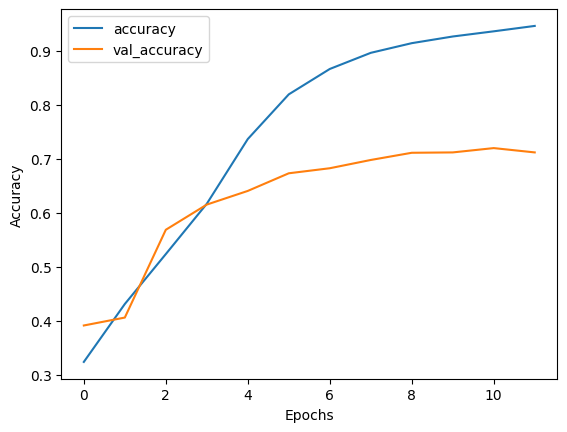

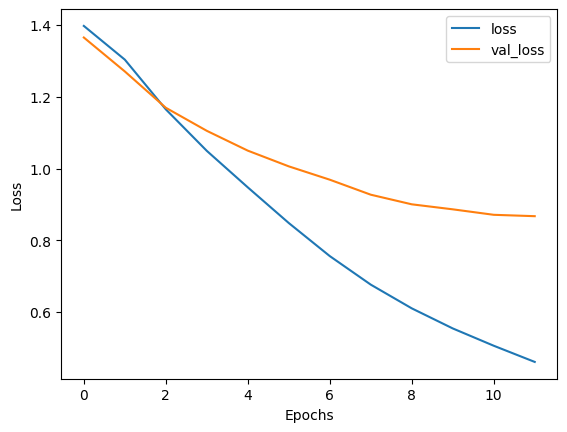

In [82]:
plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

# Visualizing Word Embeddings

In [68]:
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.get_weights()[0]
print(embedding_weights.shape)

(64010, 64)


In [69]:
reverse_word_index = label_tokenizer.index_word

In [70]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1,vocab_size):
  word_name = reverse_word_index[word_num]
  word_embedding = embedding_weights[word_num]

  out_m.write(word_name + "\n")
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

out_v.close()
out_m.close()

In [71]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

https://projector.tensorflow.org/

# GRU

In [65]:
padded_train, padded_test, padded_validation, y_train, y_val, y_test, max_length = changeMaxLength(50)

In [60]:
print(padded_train[0])

[15431  1147  6826   658  7826    25   146     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]


In [61]:
dropout_rate = 0.2
learning_rate = 0.001

In [68]:
model_GRU = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    tf.keras.layers.GRU(256, return_sequences=True, name='GRU_1_returns_seq',recurrent_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.GRU(128, return_sequences=True, name='GRU_2_returns_seq'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.GRU(64, name='GRU_3_returns_last_only'),
    tf.keras.layers.Dense(4,activation=tf.nn.log_softmax)
])

In [69]:
prediction = model_GRU(padded_train)

# Show the summary of the model
model_GRU.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (21500, 50, 64)        │     4,096,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU_1_returns_seq (GRU)         │ (21500, 50, 256)       │       247,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (21500, 50, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU_2_returns_seq (GRU)         │ (21500, 50, 128)       │       148,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (21500, 50, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU_3_returns_last_only (GRU)   │ (21500, 64)            │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (21500, 4)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,529,668 (17.28 MB)

 Trainable params: 4,529,668 (17.28 MB)

 Non-trainable params: 0 (0.00 B)

In [249]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model_GRU.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

In [70]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [71]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [72]:
model_GRU.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

In [73]:
history = model_GRU.fit(padded_train,y_train,epochs=12,validation_data=(padded_validation,y_val))

Epoch 1/12
672/672 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.2555 - loss: 1.7205 - val_accuracy: 0.2500 - val_loss: 1.3864
Epoch 2/12
672/672 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2446 - loss: 1.3870 - val_accuracy: 0.2500 - val_loss: 1.3864
Epoch 3/12
672/672 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2460 - loss: 1.3869 - val_accuracy: 0.2500 - val_loss: 1.3865
Epoch 4/12
672/672 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2486 - loss: 1.3868 - val_accuracy: 0.2500 - val_loss: 1.3884
Epoch 5/12
672/672 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2575 - loss: 1.3867 - val_accuracy: 0.2500 - val_loss: 1.3867
Epoch 6/12
672/672 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2490 - loss: 1.3867 - val_accuracy: 0.2500 - val_loss: 1.3864
Epoch 7/12
672/672 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2471 - loss: 1.3866 - val_accuracy: 0.2500 - val_loss: 1.3867
Epoch 8/12
672/672 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2526 - loss: 1.3868 - val_acc

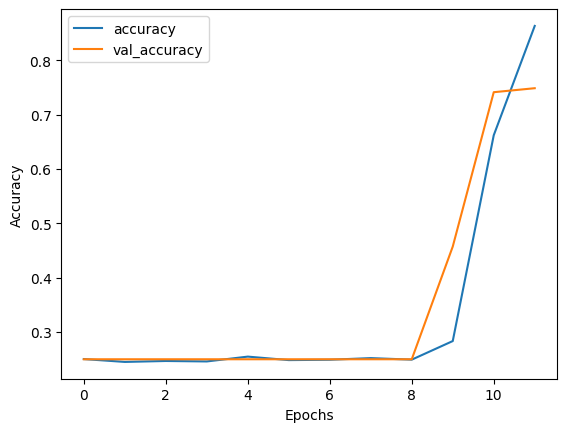

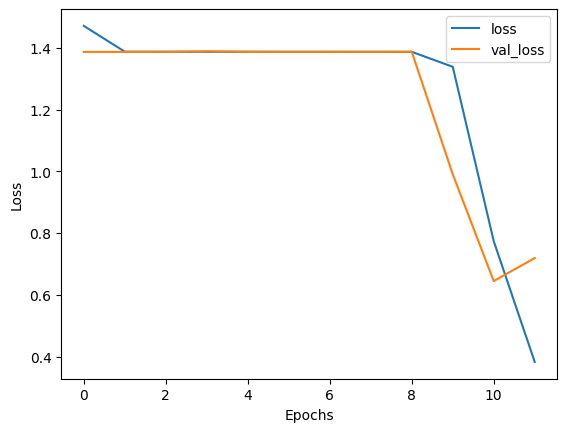

In [74]:
plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

In [75]:
train_loss, train_accuracy = model_GRU.evaluate(padded_train,y_train)
print(f'Train Accuracy: {train_accuracy}')

672/672 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9525 - loss: 0.1703
Train Accuracy: 0.95274418592453


In [76]:
validation_loss, validation_accuracy = model_GRU.evaluate(padded_validation,y_val)
print(f'Validation Accuracy: {validation_accuracy}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7294 - loss: 0.7263
Validation Accuracy: 0.7486666440963745


In [77]:
test_loss, test_accuracy = model_GRU.evaluate(padded_test,y_test)
print(f'Testing Accuracy: {test_accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7268 - loss: 0.7407
Testing Accuracy: 0.7475000023841858


# Masking the padding

In [63]:
def changeMaxLengthPadMinusOne(length):
    max_length = length
    padded_train = pad_sequences(label_sequences_train,padding='post', maxlen=max_length, truncating='post',value=-1)
    padded_test = pad_sequences(label_sequences_test,padding='post', maxlen=max_length, truncating='post',value=-1)
    padded_validation = pad_sequences(label_sequences_validation,padding='post', maxlen=max_length, truncating='post',value=-1)
    y_train = tf.convert_to_tensor(train_data['label'],dtype=tf.int32)
    y_val = tf.convert_to_tensor(validation_data['label'],dtype=tf.int32)
    y_test = tf.convert_to_tensor(test_data['label'],dtype=tf.int32)

    return padded_train, padded_test, padded_validation, y_train, y_val, y_test, max_length

In [64]:
padded_train, padded_test, padded_validation, y_train, y_val, y_test, max_length = changeMaxLengthPadMinusOne(70)

In [65]:
print(padded_train[0])

[15438  1178  6881   678  7875    28   153    -1    -1    -1    -1    -1
    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1
    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1
    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1
    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1
    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1]


In [193]:
dropout_rate = 0.2
learning_rate = 0.01

In [66]:
def model_gru_mask(vocab_size,max_length,dropout_rate,output_dim=64):
    model = tf.keras.Sequential(name = 'sequential')
    model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length, mask_zero = True))
    model.add(tf.keras.layers.LayerNormalization())
    model.add(tf.keras.layers.GRU(256, return_sequences=True, name='GRU_1_returns_seq'))
    model.add(tf.keras.layers.LayerNormalization())
#     model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.GRU(128, return_sequences=True, name='GRU_2_returns_seq'))
#     model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.GRU(64, name='GRU_3_returns_last_only'))
    model.add(tf.keras.layers.Dense(4,activation=tf.nn.log_softmax))
    
    return model

In [67]:
def masked_loss(y_true, y_pred):
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    mask = tf.not_equal(y_true, -1)
    y_true = tf.where(mask, y_true, tf.zeros_like(y_true))
    loss = loss_fn(y_true, y_pred, sample_weight=tf.cast(mask, dtype=tf.float32))

    return  loss 

In [68]:
def masked_accuracy(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32) 
    mask = tf.not_equal(y_true, -1)
    mask = tf.cast(mask, tf.float32) 
    y_pred_class = tf.math.argmax(y_pred, axis=-1)
    y_pred_class = tf.cast(y_pred_class, tf.float32) 
    matches_true_pred  = tf.equal(y_true, y_pred_class)
    matches_true_pred = tf.cast(matches_true_pred , tf.float32) 
    matches_true_pred *= mask
    masked_acc = tf.reduce_sum(matches_true_pred)/tf.reduce_sum(mask)
    
    return masked_acc

In [205]:
model = model_gru_mask(vocab_size=vocab_size,max_length=max_length,dropout_rate=dropout_rate)

input_shape = (len(padded_train), max_length)  
model.build(input_shape=input_shape)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ (21500, 70, 64)        │     3,988,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_12          │ (21500, 70, 64)        │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU_1_returns_seq (GRU)         │ (21500, 70, 256)       │       247,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_13          │ (21500, 70, 256)       │           512 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU_2_returns_seq (GRU)         │ (21500, 70, 128)       │       148,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU_3_returns_last_only (GRU)   │ (21500, 64)            │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (21500, 4)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,422,404 (16.87 MB)

 Trainable params: 4,422,404 (16.87 MB)

 Non-trainable params: 0 (0.00 B)

In [206]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), 
              loss = masked_loss,
               metrics = [masked_accuracy])

In [207]:
history = model.fit(padded_train,y_train,epochs=30,validation_data=(padded_validation,y_val))

Epoch 1/30
672/672 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 1.3745 - masked_accuracy: 0.3479 - val_loss: 0.9583 - val_masked_accuracy: 0.5239
Epoch 2/30
672/672 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.9041 - masked_accuracy: 0.5695 - val_loss: 0.8702 - val_masked_accuracy: 0.5877
Epoch 3/30
672/672 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.7603 - masked_accuracy: 0.6733 - val_loss: 0.8225 - val_masked_accuracy: 0.6305
Epoch 4/30
672/672 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.6972 - masked_accuracy: 0.7133 - val_loss: 0.9169 - val_masked_accuracy: 0.6177
Epoch 5/30
672/672 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.7087 - masked_accuracy: 0.7125 - val_loss: 0.9272 - val_masked_accuracy: 0.5997
Epoch 6/30
672/672 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.7363 - masked_accuracy: 0.6893 - val_loss: 0.8999 - val_masked_accuracy: 0.6161
Epoch 7/30
672/672 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.6767 - masked_accuracy: 0.7264 - val_loss: 0.8914 - val_masked_accuracy:

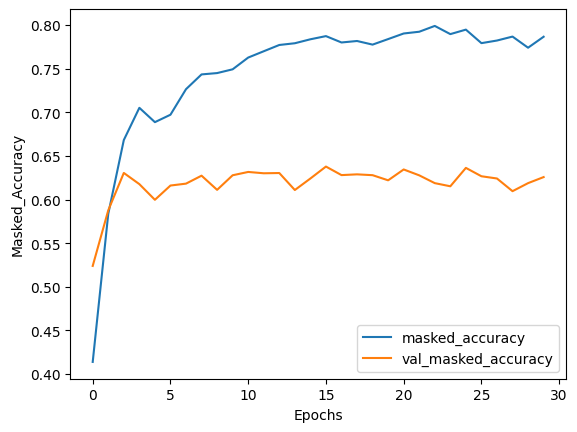

KeyError: 'masked_loss'

In [208]:
plot_metrics(history, "masked_accuracy")
plot_metrics(history, "masked_loss")

In [209]:
train_loss, train_accuracy = model.evaluate(padded_train,y_train)
print(f'Train Accuracy: {train_accuracy}')

672/672 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.6230 - masked_accuracy: 0.7929
Train Accuracy: 0.7953470349311829


In [210]:
validation_loss, validation_accuracy = model.evaluate(padded_validation,y_val)
print(f'Validation Accuracy: {validation_accuracy}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9196 - masked_accuracy: 0.6588
Validation Accuracy: 0.6257598996162415


In [211]:
test_loss, test_accuracy = model.evaluate(padded_test,y_test)
print(f'Testing Accuracy: {test_accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9879 - masked_accuracy: 0.6465
Testing Accuracy: 0.6448412537574768


# masked lstm

In [225]:
padded_train, padded_test, padded_validation, y_train, y_val, y_test, max_length = changeMaxLengthPadMinusOne(90)
dropout_rate = 0.3
learning_rate = 0.0006

def model_gru_mask(vocab_size,max_length,dropout_rate,output_dim=64):
    model = tf.keras.Sequential(name = 'sequential')
    model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length, mask_zero = True))
    model.add(tf.keras.layers.LayerNormalization())
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
    model.add(tf.keras.layers.Dense(4,activation=tf.nn.log_softmax))
    
    return model
model = model_gru_mask(vocab_size=vocab_size,max_length=max_length,dropout_rate=dropout_rate)

input_shape = (len(padded_train), max_length)  
model.build(input_shape=input_shape)
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), 
              loss = masked_loss,
               metrics = [masked_accuracy])
history = model.fit(padded_train,y_train,epochs=3,validation_data=(padded_validation,y_val))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_32 (Embedding)        │ (21500, 90, 64)        │     3,988,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_27          │ (21500, 90, 64)        │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_42                │ (21500, 90, 128)       │        66,048 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (21500, 90, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_43                │ (21500, 128)           │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (21500, 4)             │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,154,244 (15.85 MB)

 Trainable params: 4,154,244 (15.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
672/672 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 1.0641 - masked_accuracy: 0.5134 - val_loss: 0.6684 - val_masked_accuracy: 0.7394
Epoch 2/3
672/672 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.2833 - masked_accuracy: 0.9036 - val_loss: 0.7917 - val_masked_accuracy: 0.7220
Epoch 3/3
672/672 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0882 - masked_accuracy: 0.9725 - val_loss: 1.0798 - val_masked_accuracy: 0.6979


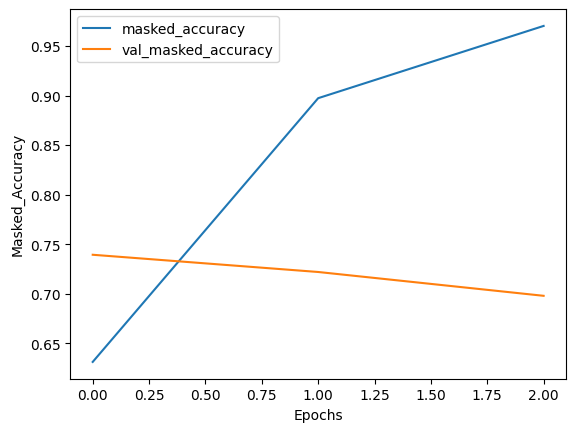

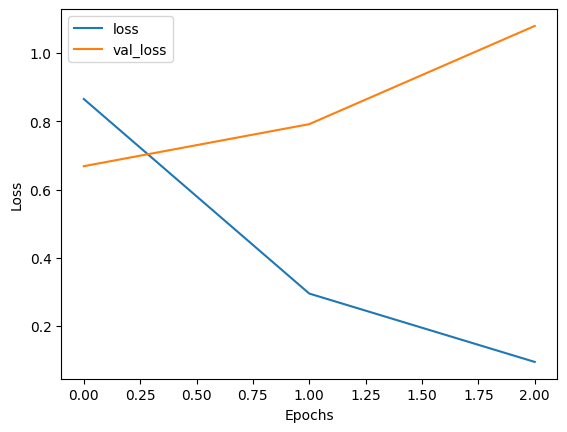

672/672 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0459 - masked_accuracy: 0.9871
Train Accuracy: 0.9898092150688171
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0323 - masked_accuracy: 0.6998
Validation Accuracy: 0.6979482769966125
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0533 - masked_accuracy: 0.7042
Testing Accuracy: 0.713789701461792


In [230]:
plot_metrics(history, "masked_accuracy")
plot_metrics(history, "loss")

train_loss, train_accuracy = model.evaluate(padded_train,y_train)
print(f'Train Accuracy: {train_accuracy}')

validation_loss, validation_accuracy = model.evaluate(padded_validation,y_val)
print(f'Validation Accuracy: {validation_accuracy}')

test_loss, test_accuracy = model.evaluate(padded_test,y_test)
print(f'Testing Accuracy: {test_accuracy}')

# LSTM

In [69]:
padded_train, padded_test, padded_validation, y_train, y_val, y_test, max_length = changeMaxLength(80)

In [70]:
print(padded_train[0])

[15438  1178  6881   678  7875    28   153     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]


In [71]:
from tensorflow.keras.layers import Embedding, BatchNormalization, Dropout, Bidirectional, LSTM, Dense, Lambda, Input

In [243]:
dropout_rate1 = 0.5
dropout_rate2 = 0.2
learning_rate = 0.01
embedding_length = 128

In [235]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_length, input_length=max_length),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(dropout_rate1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100,return_sequences=True)),
    tf.keras.layers.LayerNormalization(),
#     tf.keras.layers.Dropout(dropout_rate2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(4,activation=tf.nn.log_softmax)
])

In [109]:
dropout_rate1 = 0.5
learning_rate = 0.00057
embedding_length = 128

In [110]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_length, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True,recurrent_regularizer=tf.keras.regularizers.l2(0.05))),
    BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True,recurrent_regularizer=tf.keras.regularizers.l2(0.05))),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(4,recurrent_regularizer=tf.keras.regularizers.l2(0.01))),
    tf.keras.layers.Dense(4,activation=tf.nn.log_softmax)
])

In [111]:
prediction = model_LSTM(padded_train)

# Show the summary of the model
model_LSTM.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (21500, 80, 128)       │     7,977,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_21                │ (21500, 80, 64)        │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (21500, 80, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_22                │ (21500, 80, 32)        │        10,368 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_23                │ (21500, 8)             │         1,184 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (21500, 4)             │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,030,532 (30.63 MB)

 Trainable params: 8,030,404 (30.63 MB)

 Non-trainable params: 128 (512.00 B)

In [112]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model_LSTM.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

In [113]:
history = model_LSTM.fit(padded_train,y_train,epochs=4,validation_data=(padded_validation,y_val))

Epoch 1/4
672/672 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.4554 - loss: 3.1600 - val_accuracy: 0.7013 - val_loss: 0.8359
Epoch 2/4
672/672 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.8175 - loss: 0.6009 - val_accuracy: 0.7180 - val_loss: 0.7766
Epoch 3/4
672/672 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9277 - loss: 0.3088 - val_accuracy: 0.7180 - val_loss: 0.8251
Epoch 4/4
672/672 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9657 - loss: 0.1658 - val_accuracy: 0.7280 - val_loss: 0.8864


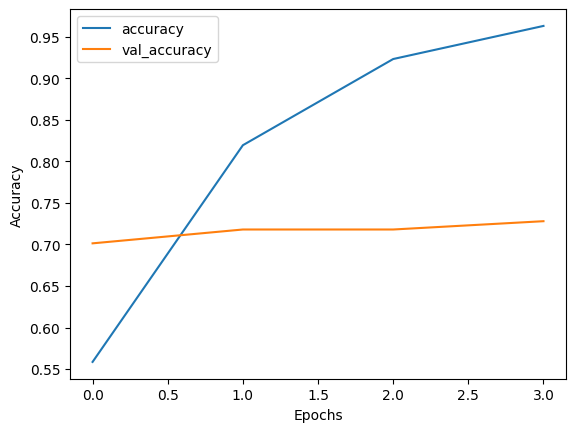

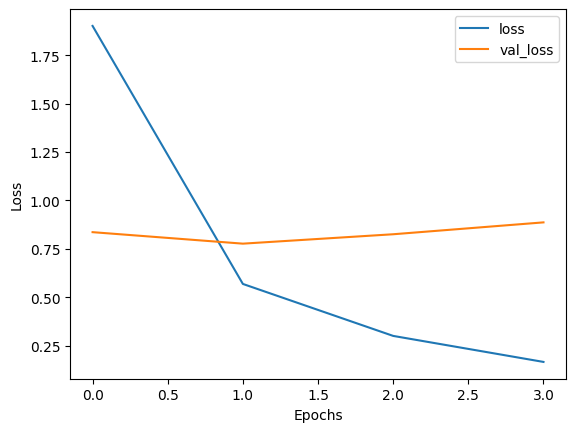

In [114]:
plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

In [115]:
train_loss, train_accuracy = model_LSTM.evaluate(padded_train,y_train)
print(f'Train Accuracy: {train_accuracy}')

672/672 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9691 - loss: 0.1636
Train Accuracy: 0.9795348644256592


In [116]:
validation_loss, validation_accuracy = model_LSTM.evaluate(padded_validation,y_val)
print(f'Validation Accuracy: {validation_accuracy}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6457 - loss: 1.0982
Validation Accuracy: 0.7279999852180481


In [117]:
test_loss, test_accuracy = model_LSTM.evaluate(padded_test,y_test)
print(f'Testing Accuracy: {test_accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6154 - loss: 1.2083
Testing Accuracy: 0.7120000123977661


# FastText embedding

In [119]:
!pip install fasttext


In [120]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.mr.300.bin.gz
!gunzip cc.mr.300.bin.gz

--2024-07-21 20:33:50--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.mr.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.164.78.72, 18.164.78.128, 18.164.78.81, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.164.78.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3220048823 (3.0G) [application/octet-stream]
Saving to: 'cc.mr.300.bin.gz'

cc.mr.300.bin.gz    100%[===================>]   3.00G   237MB/s    in 13s     

2024-07-21 20:34:03 (241 MB/s) - 'cc.mr.300.bin.gz' saved [3220048823/3220048823]



In [121]:
import fasttext

# Load the FastText model
ft_model = fasttext.load_model('cc.mr.300.bin')

In [122]:
import numpy as np

# Define the embedding dimension
embedding_dim = 300  # FastText model's embedding dimension

# Initialize the embedding matrix
embedding_matrix = np.zeros((len(label_word_index_train) + 1, embedding_dim))

# Populate the embedding matrix with FastText embeddings
for word, i in label_word_index_train.items():
    embedding_vector = ft_model.get_word_vector(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


# IMP

In [393]:
dropout_rate1 = 0.5
learning_rate = 0.00158
embedding_length = 128

In [394]:
padded_train, padded_test, padded_validation, y_train, y_val, y_test, max_length = changeMaxLength(70)

In [395]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(label_word_index_train) + 1,
                              output_dim=embedding_dim,
                              weights=[embedding_matrix],
                              input_length=70,
                              trainable=False),
#     tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences = True,recurrent_regularizer=tf.keras.regularizers.l2(0.1))),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
#     tf.keras.layers.Dense(64,activation='relu'),
#     tf.keras.layers.Dense(32,activation='relu'),
#     tf.keras.layers.LayerNormalization(),
#     tf.keras.layers.Dense(16,activation=tf.nn.log_softmax),
    tf.keras.layers.Dense(4,activation=tf.nn.log_softmax)
])

In [396]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [397]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [398]:
model_LSTM.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

In [399]:
history = model_LSTM.fit(padded_train,y_train,epochs=10,validation_data=(padded_validation,y_val))

Epoch 1/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.4575 - loss: 3.9181 - val_accuracy: 0.5480 - val_loss: 1.0509
Epoch 2/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.5694 - loss: 1.0779 - val_accuracy: 0.5920 - val_loss: 0.9950
Epoch 3/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.6148 - loss: 0.9415 - val_accuracy: 0.6100 - val_loss: 0.9374
Epoch 4/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.6598 - loss: 0.8518 - val_accuracy: 0.6727 - val_loss: 0.8191
Epoch 5/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.7005 - loss: 0.7626 - val_accuracy: 0.6847 - val_loss: 0.7694
Epoch 6/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.7315 - loss: 0.6979 - val_accuracy: 0.6940 - val_loss: 0.7889
Epoch 7/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.7603 - loss: 0.6389 - val_accuracy: 0.6987 - val_loss: 0.7664
Epoch 8/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.7782 - loss: 0.5896 - 

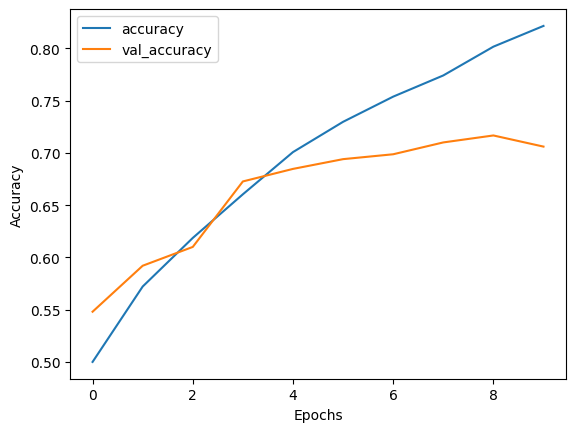

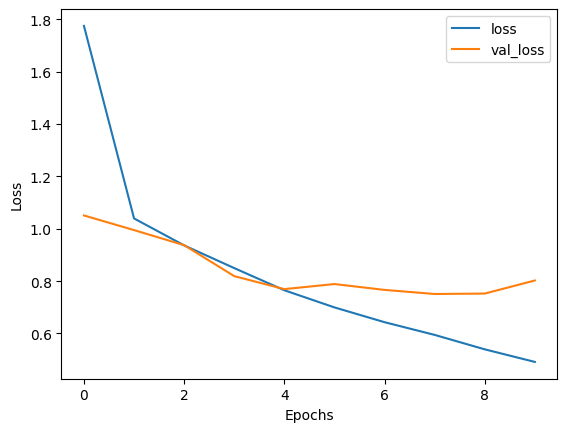

In [400]:
plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

In [401]:
train_loss, train_accuracy = model_LSTM.evaluate(padded_train,y_train)
print(f'Train Accuracy: {train_accuracy}')

672/672 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8434 - loss: 0.4650
Train Accuracy: 0.8713953495025635


In [402]:
validation_loss, validation_accuracy = model_LSTM.evaluate(padded_validation,y_val)
print(f'Validation Accuracy: {validation_accuracy}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6567 - loss: 0.9230
Validation Accuracy: 0.7059999704360962


In [403]:
test_loss, test_accuracy = model_LSTM.evaluate(padded_test,y_test)
print(f'Testing Accuracy: {test_accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6447 - loss: 0.9608
Testing Accuracy: 0.6834999918937683


# V IMP

In [87]:
padded_train, padded_test, padded_validation, y_train, y_val, y_test, max_length = changeMaxLength(50)
dropout_rate = 0.2
# learning_rate = 0.00152
learning_rate = 0.001515
model_GRU = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(label_word_index_train) + 1,
                              output_dim=embedding_dim,
                              weights=[embedding_matrix],
                              input_length=70,
                              trainable=False),
    tf.keras.layers.GRU(256, return_sequences=True, name='GRU_1_returns_seq',recurrent_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.GRU(128, return_sequences=True, name='GRU_2_returns_seq'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.GRU(64, name='GRU_3_returns_last_only'),
    tf.keras.layers.Dense(4,activation=tf.nn.log_softmax)
])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model_GRU.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)
history = model_GRU.fit(padded_train,y_train,epochs=10,validation_data=(padded_validation,y_val))


Epoch 1/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2494 - loss: 1.6299 - val_accuracy: 0.2500 - val_loss: 1.3866
Epoch 2/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2543 - loss: 1.3871 - val_accuracy: 0.2507 - val_loss: 1.3865
Epoch 3/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2515 - loss: 1.3870 - val_accuracy: 0.2500 - val_loss: 1.3872
Epoch 4/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.2938 - loss: 1.3594 - val_accuracy: 0.4347 - val_loss: 1.1909
Epoch 5/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4771 - loss: 1.1544 - val_accuracy: 0.5800 - val_loss: 0.9778
Epoch 6/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5977 - loss: 0.9657 - val_accuracy: 0.6987 - val_loss: 0.8013
Epoch 7/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6697 - loss: 0.8251 - val_accuracy: 0.7093 - val_loss: 0.7364
Epoch 8/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7116 - loss: 0.7415 - val_accuracy:

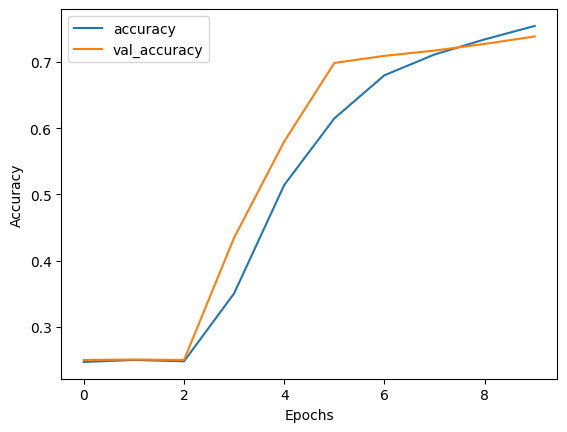

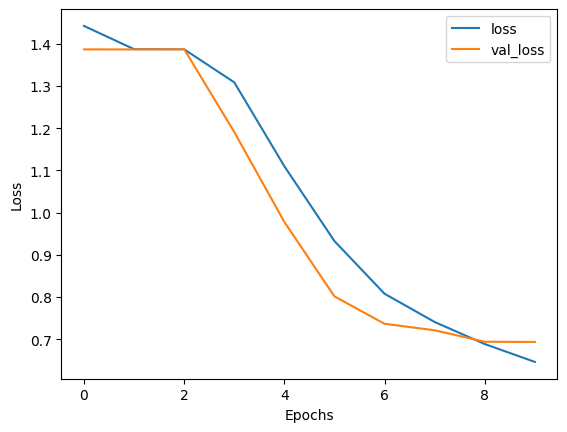

In [88]:
plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

In [89]:
train_loss, train_accuracy = model_GRU.evaluate(padded_train,y_train)
print(f'Train Accuracy: {train_accuracy}')

validation_loss, validation_accuracy = model_GRU.evaluate(padded_validation,y_val)
print(f'Validation Accuracy: {validation_accuracy}')

test_loss, test_accuracy = model_GRU.evaluate(padded_test,y_test)
print(f'Testing Accuracy: {test_accuracy}')

672/672 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7500 - loss: 0.6565
Train Accuracy: 0.7839534878730774
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6728 - loss: 0.8315
Validation Accuracy: 0.7386666536331177
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6531 - loss: 0.8752
Testing Accuracy: 0.703499972820282


In [76]:
print(len(padded_train[0]))

50


In [90]:
predictions = model_GRU.predict(padded_test)
predicted_classes = tf.argmax(predictions, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


HATE = 1

OFFN = 2

PRFN = 3

NOT = 0

In [123]:
padded_train, padded_test, padded_validation, y_train, y_val, y_test, max_length = changeMaxLength(70)
dropout_rate = 0.2
learning_rate = 0.00152
# learning_rate = 0.001515
# learning_rate = 0.001523
model_GRU = tf.keras.Sequential([
#     tf.keras.layers.Embedding(input_dim=len(label_word_index_train) + 1,
#                               output_dim=embedding_dim,
#                               weights=[embedding_matrix],
#                               input_length=70,
#                               trainable=False),
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    tf.keras.layers.GRU(256, return_sequences=True, name='GRU_1_returns_seq',recurrent_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.GRU(128, return_sequences=True, name='GRU_2_returns_seq'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.GRU(64, name='GRU_3_returns_last_only'),
    tf.keras.layers.Dense(4,activation=tf.nn.log_softmax)
])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model_GRU.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)
history = model_GRU.fit(padded_train,y_train,epochs=13,validation_data=(padded_validation,y_val))

Epoch 1/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.2552 - loss: 1.6294 - val_accuracy: 0.2500 - val_loss: 1.3875
Epoch 2/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2529 - loss: 1.3872 - val_accuracy: 0.2500 - val_loss: 1.3868
Epoch 3/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2475 - loss: 1.3873 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 4/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2532 - loss: 1.3869 - val_accuracy: 0.2500 - val_loss: 1.3870
Epoch 5/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2541 - loss: 1.3873 - val_accuracy: 0.2500 - val_loss: 1.3864
Epoch 6/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2518 - loss: 1.3869 - val_accuracy: 0.2500 - val_loss: 1.3866
Epoch 7/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2543 - loss: 1.3869 - val_accuracy: 0.2500 - val_loss: 1.3864
Epoch 8/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2542 - loss: 1.3868 - val_acc

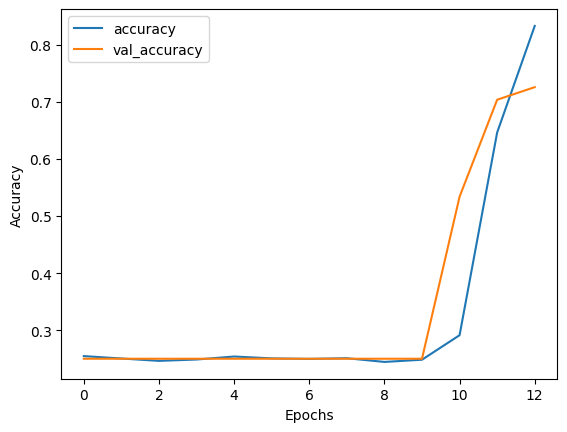

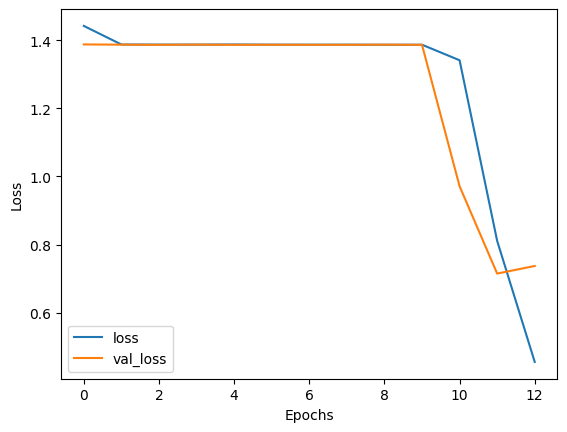

In [124]:
plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

In [125]:
train_loss, train_accuracy = model_GRU.evaluate(padded_train,y_train)
print(f'Train Accuracy: {train_accuracy}')

validation_loss, validation_accuracy = model_GRU.evaluate(padded_validation,y_val)
print(f'Validation Accuracy: {validation_accuracy}')

test_loss, test_accuracy = model_GRU.evaluate(padded_test,y_test)
print(f'Testing Accuracy: {test_accuracy}')

672/672 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9465 - loss: 0.2274
Train Accuracy: 0.945023238658905
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7212 - loss: 0.7468
Validation Accuracy: 0.7260000109672546
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7157 - loss: 0.7706
Testing Accuracy: 0.7315000295639038


In [126]:
print(embedding_dim)

300


In [128]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Concatenate, GRU, Dropout, Dense, Input, Flatten
from tensorflow.keras.models import Model

# Assume changeMaxLength and other preprocessing steps have been done
padded_train, padded_test, padded_validation, y_train, y_val, y_test, max_length = changeMaxLength(70)
dropout_rate = 0.2
learning_rate = 0.001



# Input layer
input_text = Input(shape=(max_length,), dtype='int32')

# First embedding layer
embedding_1 = Embedding(input_dim=len(label_word_index_train) + 1,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=max_length,
                        trainable=False)(input_text)

# Second embedding layer
embedding_2 = Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length)(input_text)

# Concatenate embeddings
concatenated_embeddings = Concatenate()([embedding_1, embedding_2])

# GRU layers
gru_1 = GRU(256, return_sequences=True, name='GRU_1_returns_seq', recurrent_regularizer=tf.keras.regularizers.l2(0.01))(concatenated_embeddings)
dropout_1 = Dropout(dropout_rate)(gru_1)
gru_2 = GRU(128, return_sequences=True, name='GRU_2_returns_seq')(dropout_1)
dropout_2 = Dropout(dropout_rate)(gru_2)
gru_3 = GRU(64, name='GRU_3_returns_last_only')(dropout_2)

# Output layer
output = Dense(4, activation=tf.nn.log_softmax)(gru_3)

# Define the model
model_GRU = Model(inputs=input_text, outputs=output)

# Compile the model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model_GRU.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

# Print model summary
model_GRU.summary()

# Train the model
history = model_GRU.fit(padded_train, y_train, epochs=13, validation_data=(padded_validation, y_val))


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 70)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_11        │ (None, 70, 300)   │ 18,697,200 │ input_layer_10[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_12        │ (None, 70, 64)    │  3,988,736 │ input_layer_10[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 70, 364)   │          0 │ embedding_11[0][… │
│ (Concatenate)       │                   │            │ embedding_12[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ GRU_1_returns_seq   │ (None, 70, 256)   │    477,696 │ concatenate_1[0]… │
│ (GRU)               │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 70, 256)   │          0 │ GRU_1_returns_se… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ GRU_2_returns_seq   │ (None, 70, 128)   │    148,224 │ dropout_4[0][0]   │
│ (GRU)               │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 70, 128)   │          0 │ GRU_2_returns_se… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ GRU_3_returns_last… │ (None, 64)        │     37,248 │ dropout_5[0][0]   │
│ (GRU)               │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 4)         │        260 │ GRU_3_returns_la… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,349,364 (89.07 MB)

 Trainable params: 4,652,164 (17.75 MB)

 Non-trainable params: 18,697,200 (71.32 MB)

Epoch 1/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.2406 - loss: 1.7214 - val_accuracy: 0.2500 - val_loss: 1.3866
Epoch 2/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2473 - loss: 1.3871 - val_accuracy: 0.2500 - val_loss: 1.3864
Epoch 3/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2459 - loss: 1.3871 - val_accuracy: 0.2500 - val_loss: 1.3866
Epoch 4/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2487 - loss: 1.3867 - val_accuracy: 0.2500 - val_loss: 1.3864
Epoch 5/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2579 - loss: 1.3860 - val_accuracy: 0.2500 - val_loss: 1.3864
Epoch 6/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2446 - loss: 1.3869 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 7/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2494 - loss: 1.3867 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 8/13
672/672 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2509 - loss: 1.3868 - 